In [1]:
# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
# These imports are actually NOT NEEDED if you already know the name of
# the ttree within the root file.
import math
from math import exp
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm
import uproot
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.mlab as mlab
from pylab import rcParams
plt.rcParams.update({'font.size': 18})



from root_numpy import root2array
from scipy.interpolate import interp1d
from scipy.misc import factorial

Welcome to JupyROOT 6.12/06


In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
folder = "gamma3d"
folder_corr= 'gammacorrelation'
folder_truth='TruthStudies'
TREE_CLUSTER = "Clustertree"
TREE_MATCHING = "Matchingtree"
TREE_SPS="Sps_Correlationtree"
TREE_EVENT="Event_Correlationtree"
TREE_EVENT_TRUTH="Eventtree"
TREE_MCPARTICLE_TRUTH="MCParticletree"

In [4]:
CLEAN_REGION = 'Y_cluster_3d_hit_z>800 or (Y_cluster_3d_hit_z>400 and Y_cluster_3d_hit_z<600)'
MATCH_CUT='Y_cluster_3d_hit_y > -120.0 and Y_cluster_3d_hit_y < 120.0'

In [5]:
cluster_track_file_prod_electron='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_electron_0.0-3MeV_clustertrackdistance_hadd.root'
truth_studies_file_prod_electron='/uboone/data/users/abhat/GammaCatcher/low_threshold/cc_inclusive_low_threshold/prod_electron_0.0-3MeV_truthstudies_hadd.root'

In [6]:
Cluster_tree_prod_electron = uproot.open(cluster_track_file_prod_electron)[folder][TREE_CLUSTER]
Matching_tree_prod_electron = uproot.open(cluster_track_file_prod_electron)[folder][TREE_MATCHING]
Sps_tree_prod_electron=uproot.open(truth_studies_file_prod_electron)[folder_truth][TREE_SPS]


Event_tree_prod_electron_truth=uproot.open(truth_studies_file_prod_electron)[folder_truth][TREE_EVENT_TRUTH]
MCParticle_tree_prod_electron_truth=uproot.open(truth_studies_file_prod_electron)[folder_truth][TREE_MCPARTICLE_TRUTH]

In [7]:
# df_Matching_prod_electron_=Matching_tree_prod_electron_.pandas.df().query(CLEAN_REGION)

df_Matching_prod_electron=Matching_tree_prod_electron.pandas.df()

df_Cluster_prod_electron=Cluster_tree_prod_electron.pandas.df()

df_Correlation_prod_electron_Sps=Sps_tree_prod_electron.pandas.df()

df_Event_tree_prod_electron=Event_tree_prod_electron_truth.pandas.df()

df_MCParticle_tree_prod_electron=MCParticle_tree_prod_electron_truth.pandas.df()

In [8]:
df_Matching_prod_electron.head()

,V_biggest_iou,V_match_multiplicity,U_biggest_iou,U_match_multiplicity,Y_clus_lifetime,Y_clus_hitSize,V_clus_hitSize,U_clus_hitSize,Y_cluster_3d_hit_z,Y_cluster_3d_hit_x,...,YU_iou,deltaY,deltaY_smallest,Y_Wire,start_tick_cluster0,start_tick_cluster1,start_tick_cluster2,end_tick_cluster0,end_tick_cluster1,end_tick_cluster2
entry,,,,,,,,,,,,,,,,,,,,,
0,0.689656,1,0.774968,1,7.018799,2.0,3.0,2.0,499.499999,131.861895,...,0.774968,0.173205,0.173205,1666,3210.017822,3209.771484,3210.993164,3219.074707,3219.948730,3218.011963
1,0.861145,3,0.849341,1,6.260986,2.0,3.0,2.0,499.499999,132.031115,...,0.849341,0.173205,0.173205,1666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.721450,1,0.745022,1,6.202637,2.0,2.0,2.0,499.499999,131.622032,...,0.745022,0.519615,0.519615,1666,3205.647461,3204.737305,3206.421143,3213.972900,3212.110840,3212.623779
3,0.996972,1,0.967920,1,6.590576,3.0,3.0,2.0,499.199999,131.950352,...,0.967920,0.173205,0.173205,1666,3212.696289,3212.602295,3212.604492,3219.075439,3219.212891,3219.195068
4,0.867447,1,0.885211,1,7.346191,2.0,3.0,3.0,499.799999,132.137530,...,0.885211,0.519615,0.519615,1667,3216.359375,3215.126465,3216.014160,3222.862305,3223.595215,3223.360352


In [9]:
df_Cluster_prod_electron.head()

,cluster_hit_z,cluster_hit_x,Z_reco_best,X_reco_best,distance_smallest,plane
entry,,,,,,
0,230.699999,186.761989,0.000000,0.000000,1.000000e+10,0
1,230.699999,186.761989,499.822113,132.469070,1.335813e+02,0
2,352.799999,131.808353,499.822113,132.469070,1.000000e+10,0
3,352.799999,131.808353,499.826416,132.476944,5.996430e-01,0
4,397.799999,239.333995,499.826416,132.476944,1.000000e+10,0


In [10]:
df_Correlation_prod_electron_Sps.head()

,evttime,sps_x,sps_y,sps_z,distance,sps_cluster_charge,N_Event,N_Run,N_SubRun,Vertex_x,...,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50,pointdistance_trk_smallest,distance_trk_smallest
entry,,,,,,,,,,,,,,,,,,,,,
0,371749204,131.885178,-1.801281,499.624908,516.741709,220.530518,1,1,1,0.0,...,0,0.0,1.307754e-32,0.0,0.0,0.0,1.000000e+10,0,0.643687,0.643687
1,371749204,132.026978,-1.454871,499.586578,516.739769,109.490486,2,1,1,0.0,...,0,0.0,1.307754e-32,0.0,0.0,0.0,1.000000e+10,0,0.709153,0.709153
2,371749204,131.613770,-1.281666,499.722687,516.765508,189.106171,5,1,1,0.0,...,0,0.0,1.307754e-32,0.0,0.0,0.0,1.000000e+10,0,0.643525,0.643525
3,371749204,131.965576,-1.801281,499.514008,516.655012,216.234650,6,1,1,0.0,...,0,0.0,1.307754e-32,0.0,0.0,0.0,1.000000e+10,0,0.652594,0.652594
4,371749204,132.175858,-1.454871,499.955597,517.134579,187.928741,8,1,1,0.0,...,0,0.0,1.307754e-32,0.0,0.0,0.0,1.000000e+10,0,0.732011,0.732011


In [11]:
df_Event_tree_prod_electron.head()

,Event_Energy_total_MeV,Event_Energy_5_MeV,Event_Energy_10_MeV,Event_Energy_20_MeV,Event_Energy_30_MeV,Event_Energy_40_MeV,Event_Energy_50_MeV,Event_Energy_100_MeV,evttime,Vertex_x,...,neutrinotracks,muon_px,muon_py,muon_pz,maxTrkLen,tracklength,distance_nu_smallest,cosmic_trk_50,N_Run,N_SubRun
entry,,,,,,,,,,,,,,,,,,,,,
0,0.002825,0.0,0.0,0.0,0.0,0.0,0.0,0.0,371749204,0.0,...,0,0.0,1.307754e-32,0.0,0.0,0.0,1.000000e+10,0,1,1
1,0.002746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,371749204,0.0,...,0,0.0,1.307754e-32,0.0,0.0,0.0,1.000000e+10,0,1,1
2,0.000998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,371749204,-9999.0,...,0,0.0,1.307754e-32,0.0,0.0,0.0,1.000000e+10,0,1,1
3,0.000698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,371749204,-9999.0,...,0,0.0,1.307754e-32,0.0,0.0,0.0,1.000000e+10,0,1,1
4,0.002657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,371749204,0.0,...,0,0.0,1.307754e-32,0.0,0.0,0.0,1.000000e+10,0,1,1


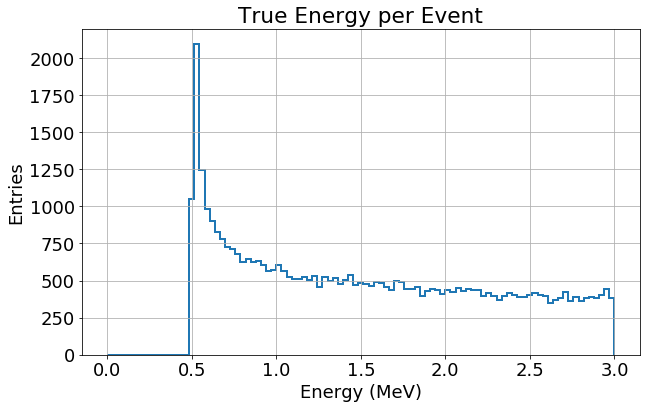

50000
entry
0        2.825174
1        2.746276
2        0.997693
3        0.697628
4        2.656644
5        3.598146
6        0.522208
7        3.032365
8        2.133531
9        2.500162
10       2.355867
11       1.762495
12       2.782110
13       1.048524
14       5.719313
15       1.700063
16       1.615354
17       1.018084
18       0.946563
19       4.208572
20       0.740277
21       2.644427
22       1.297047
23       0.628387
24       0.677448
25       8.773219
26       1.970588
27       4.446253
28       1.219451
29       0.703142
           ...   
49970    0.658433
49971    0.574391
49972    2.066980
49973    2.830496
49974    0.520164
49975    0.918317
49976    2.152118
49977    1.948822
49978    2.606713
49979    5.036411
49980    2.347340
49981    0.631493
49982    4.166290
49983    0.519981
49984    0.538222
49985    2.810710
49986    2.250915
49987    1.736185
49988    2.034745
49989    6.023923
49990    2.460576
49991    0.511053
49992    0.655216
49993    0.85905

0     0.511002
1     0.511105
2     0.511552
3     0.512040
4     0.516530
5     0.518303
6     0.554145
7     0.569515
8     0.602804
9     0.605676
10    0.618146
11    0.663136
12    0.665109
13    0.727299
14    0.744727
15    0.769748
16    0.786594
17    0.788519
18    0.793067
19    0.964503
20    0.997941
21    1.023628
22    1.124486
23    1.200834
24    1.290144
25    1.377208
26    1.483508
27    1.611182
28    1.624805
29    1.635305
30    1.680211
31    1.722413
32    1.898172
33    2.002374
34    2.067594
35    2.455872
36    2.599414
37    2.673827
38    2.915843
dtype: float64

In [12]:
# print df_Event_tree_prod_electron['Event_Energy_total_MeV']
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,3,100)
df_Event_tree_prod_electron['Event_Energy_total_MeV']= 1000* df_Event_tree_prod_electron['Event_Energy_total_MeV'].values
plt.hist(df_Event_tree_prod_electron['Event_Energy_total_MeV'].values,bins=BINS,histtype='step',lw=2,label='Reco')


plt.title("True Energy per Event")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.grid()
#plt.legend(loc=2)
plt.show()
fig.savefig('True_electron_only_primary_energy_per_event.png', dpi=300)
print df_Event_tree_prod_electron['Event_Energy_total_MeV'].shape[0]
print df_Event_tree_prod_electron['Event_Energy_total_MeV']
df_Event_tree_prod_electron['Event_Energy_total_MeV'].mode()

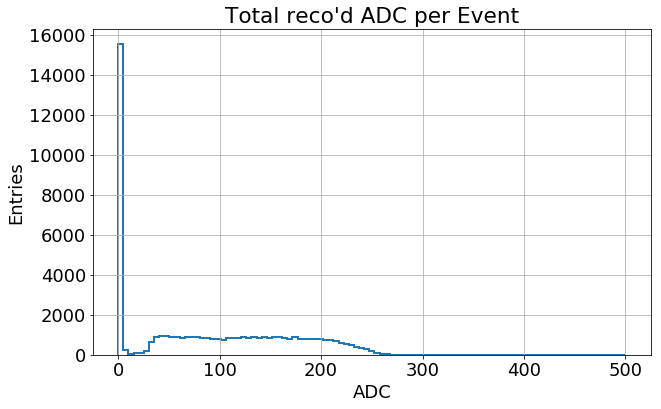

50000


In [13]:
# print df_Event_tree_prod_electron['Event_Energy_total_MeV']
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,500,100)

plt.hist(df_Event_tree_prod_electron['Event_cluster_charge'].values,bins=BINS,histtype='step',lw=2,label='Reco')


plt.title("Total reco'd ADC per Event")
plt.xlabel('ADC')
plt.ylabel('Entries')
plt.grid()
#plt.legend(loc=2)
plt.show()
print df_Event_tree_prod_electron['Event_cluster_charge'].shape[0]

In [14]:
df_MCParticle_tree_prod_electron.head()

,MC_Particle_Energy,position_X,position_Y,position_Z,pdg_particle
entry,,,,,
0,0.002825,128.000000,0.000000,500.000000,5.434722e-323
1,0.001952,128.000000,0.000000,500.000000,5.434722e-323
2,0.000794,128.050982,0.008787,499.918413,5.434722e-323
3,0.000998,128.000000,0.000000,500.000000,5.434722e-323
4,0.000698,128.000000,0.000000,500.000000,5.434722e-323


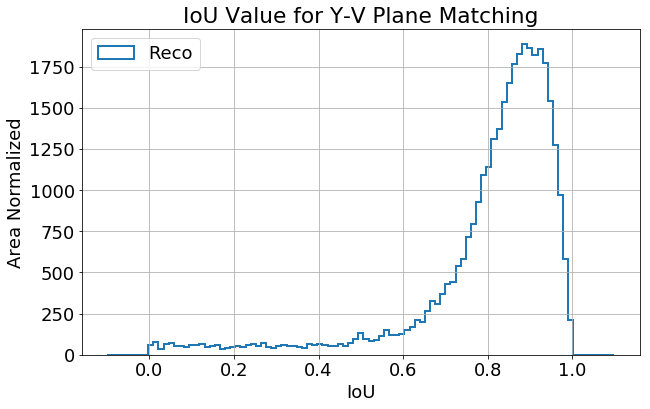

In [15]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-0.1,1.1,100)

plt.hist(df_Matching_prod_electron['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='Reco')


plt.title("IoU Value for Y-V Plane Matching")
plt.xlabel('IoU')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=2)
plt.show()

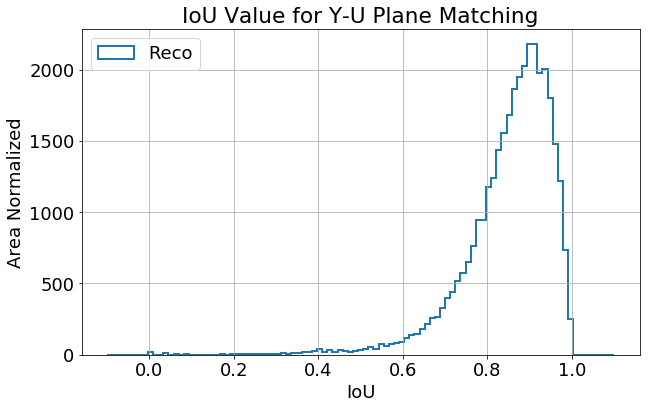

In [16]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-0.1,1.1,100)

plt.hist(df_Matching_prod_electron['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='Reco')


plt.title("IoU Value for Y-U Plane Matching")
plt.xlabel('IoU')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=2)
plt.show()

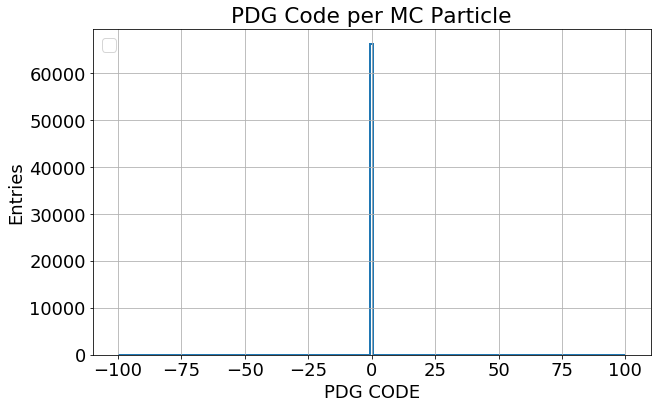

In [17]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-100,100,200)
plt.hist(df_MCParticle_tree_prod_electron['pdg_particle'].values,bins=BINS,histtype='step',lw=2)

plt.title("PDG Code per MC Particle")
plt.xlabel('PDG CODE')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=2)
plt.show()

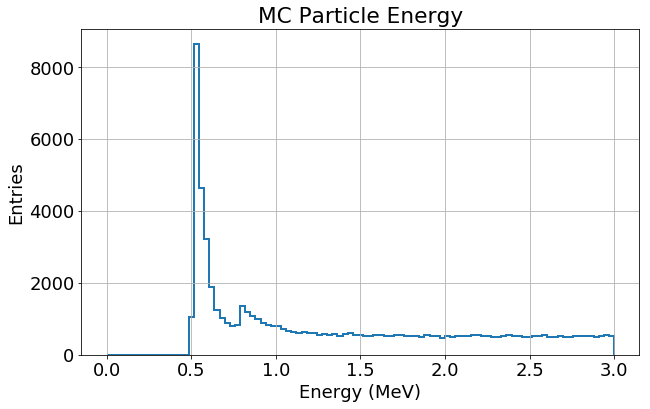

67895


In [18]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,3,100)
df_MCParticle_tree_prod_electron['MC_Particle_Energy'] = 1000* df_MCParticle_tree_prod_electron['MC_Particle_Energy'].values
plt.hist(df_MCParticle_tree_prod_electron['MC_Particle_Energy'].values,bins=BINS,histtype='step',lw=2)

plt.title("MC Particle Energy")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.grid()
# plt.legend(loc=2)
plt.show()
print df_MCParticle_tree_prod_electron.shape[0]

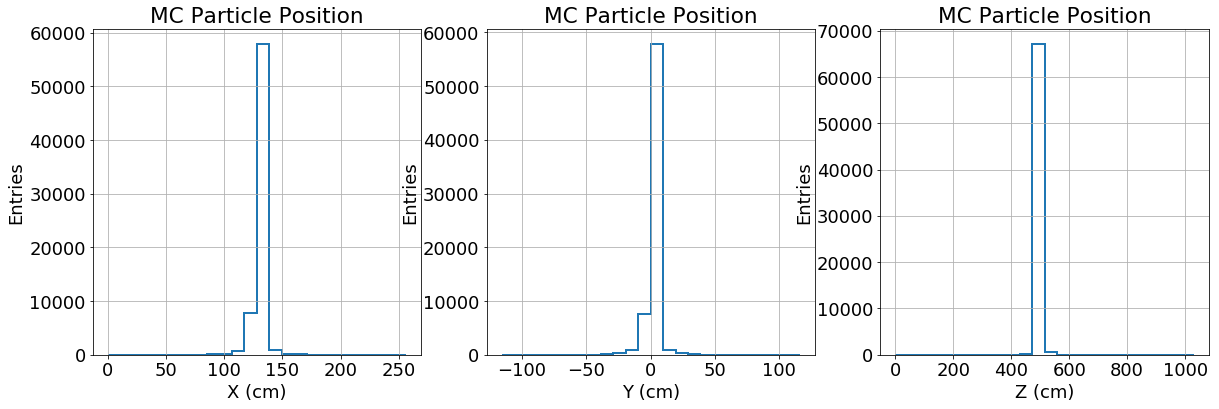

67895


In [19]:
fig = plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
BINS = np.linspace(0,256,25)

plt.hist(df_MCParticle_tree_prod_electron['position_X'].values,bins=BINS,histtype='step',lw=2)

plt.title("MC Particle Position")
plt.xlabel('X (cm)')
plt.ylabel('Entries')
plt.grid()
# plt.legend(loc=2)
plt.subplot(1, 3, 2)
BINS = np.linspace(-116,116,25)

plt.hist(df_MCParticle_tree_prod_electron['position_Y'].values,bins=BINS,histtype='step',lw=2)

plt.title("MC Particle Position")
plt.xlabel('Y (cm)')
plt.ylabel('Entries')
plt.grid()

plt.subplot(1, 3, 3)
BINS = np.linspace(0,1030,25)

plt.hist(df_MCParticle_tree_prod_electron['position_Z'].values,bins=BINS,histtype='step',lw=2)

plt.title("MC Particle Position")
plt.xlabel('Z (cm)')
plt.ylabel('Entries')
plt.grid()
plt.show()
print df_MCParticle_tree_prod_electron.shape[0]

In [20]:
# df_Matching_prod_electron_match=df_Matching_prod_electron.query(MATCH_CUT)
# df_Matching_prod_electron_3tick_match=df_Matching_prod_electron_3tick.query(MATCH_CUT)
df_Matching_prod_electron_match=df_Matching_prod_electron.query(MATCH_CUT)
# df_Matching_prod_electron_1tick_corrected_match=df_Matching_prod_electron_1tick_corrected.query(MATCH_CUT)

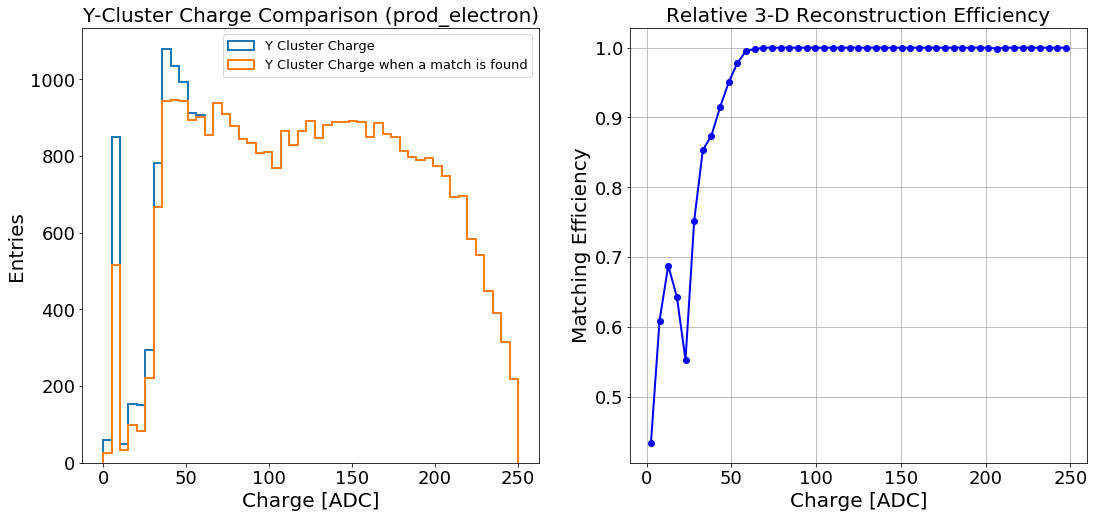

In [21]:
fig = plt.figure(figsize=(18,8))

plt.subplot(1, 2, 1)

BINS = np.linspace(0,250,50)
plt.hist(df_Matching_prod_electron['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_prod_electron_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (prod_electron)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(0,250,50)

vals2D_prod_electron, bins2D_prod_electron = np.histogram(df_Matching_prod_electron['Y_cluster_charge'].values,bins=BINS)
vals3D_prod_electron, bins3D_prod_electron = np.histogram(df_Matching_prod_electron_match['Y_cluster_charge'].values,bins=BINS)
binC_prod_electron = 0.5*(bins2D_prod_electron[1:]+bins2D_prod_electron[:-1])
vals2D_prod_electron = vals2D_prod_electron.astype(float)
#print vals2D
vals3D_prod_electron = vals3D_prod_electron.astype(float)
ratio_v_prod_electron = []
for i,v in enumerate(vals2D_prod_electron):
    if (v == 0):
        ratio_v_prod_electron.append(0.)
    else:
        ratio_v_prod_electron.append(vals3D_prod_electron[i]/v)
#print ratio_v
plt.plot(binC_prod_electron,ratio_v_prod_electron,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('Relative 3-D Reconstruction Efficiency',fontsize=20)

plt.show()


In [22]:
# Argon properties

#LAr temperature
T = 89
# density
rho = 1.38 # g/cm^3

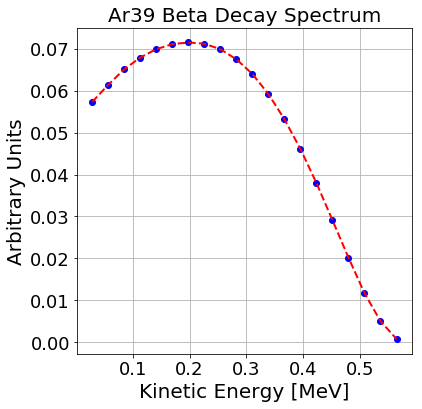

In [23]:
# Ar 39 energy spectrum

Ar39_E_v = [0.0282,0.0565,0.0847,0.1130,0.1412,0.1695,0.1977,0.2260,\
            0.2542,0.2825,0.3107,0.3390,0.3672,0.3955,0.4237,0.4520,0.4802,0.5085,0.5367,0.5650]

Ar39_A_v = [5.73E-02,6.14E-02,6.51E-02,6.79E-02,6.99E-02,7.11E-02,7.15E-02,\
            7.12E-02,6.99E-02,6.75E-02,6.40E-02,5.92E-02,5.32E-02,4.61E-02,\
            3.80E-02,2.91E-02,2.02E-02,1.17E-02,5.02E-03,7.77E-04]

# spline
Ar39spectrum = interp1d(Ar39_E_v,Ar39_A_v)

fig = plt.figure(figsize=(6,6))
plt.plot(Ar39_E_v,Ar39_A_v,'bo',lw=2)
xvals = np.linspace(Ar39_E_v[0],Ar39_E_v[-1],100)
plt.plot(xvals,Ar39spectrum(xvals),'r--',lw=2)
plt.xlabel("Kinetic Energy [MeV]",fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Beta Decay Spectrum',fontsize=20)
plt.grid()
plt.show()

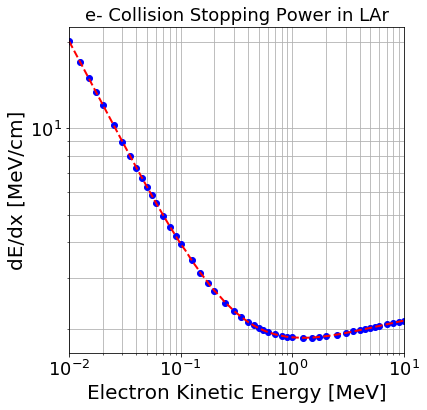

In [24]:
# load electron energy loss info [NIST]
fin = open('/uboone/app/users/abhat/gammacatcher_v08_00_00_09/srcs/ubreco/ubreco/GammaCatcher/nist_esar_ar_1p38density_188eV.txt','r')
ctr = 0

energy_v = []
collision_v = []

for line in fin:
    ctr += 1
    
    if (ctr < 9):
        continue
    words = line.split()
    if (len(words) != 4):
        continue
    energy_v.append   ( float(words[0])       )
    collision_v.append( float(words[1]) * rho )
    
energy_v    = np.array(energy_v   )
collision_v = np.array(collision_v)

dEdx = interp1d(energy_v,collision_v)

fig = plt.figure(figsize=(6,6))
plt.plot(energy_v,collision_v,'bo',lw=2)
xvals = np.linspace(0.01,10,1000)
plt.plot(xvals,dEdx(xvals),'r--',lw=2)
plt.xlim([0.01,10])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('dE/dx [MeV/cm]',fontsize=20)
plt.title('e- Collision Stopping Power in LAr',fontsize=18)
plt.show()

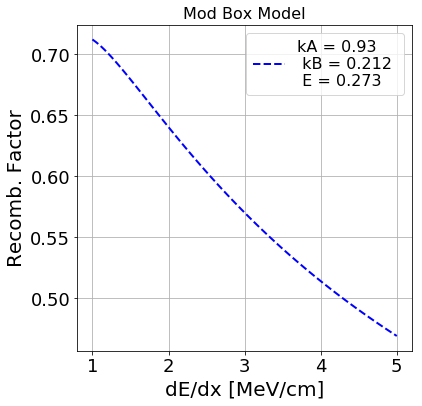

In [25]:
# Ion recombination model

# recombination model
def RecombModBox(dEdx, A, B, Efield):
    B /= (rho * Efield)
    r = np.log( dEdx * B + A ) / ( dEdx * B )
    return 1-r

def RecombBirks(dEdx, A, k, Efield):
    k /= rho
    r = ( 1 + k * dEdx / Efield ) / A
    return 1/r


fRecombA  = 0.8 # +- 0.003
fRecombk  = 0.0486 # +- 0.0006

fModBoxA = 0.93
fModBoxB = 0.212#0.212#3

fEfield  = 0.273

fig = plt.figure(figsize=(6,6))
dedx_v = np.linspace(1,5,100)
R_v = []
for dedx in dedx_v:
    R_v.append(1-RecombModBox(dedx,fModBoxA,fModBoxB,fEfield))
plt.plot(dedx_v,R_v,'b--',lw=2,label='kA = 0.93 \n kB = 0.212 \n E = 0.273')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]',fontsize=20)
plt.ylabel('Recomb. Factor',fontsize=20)
plt.title('Mod Box Model',fontsize=16)
plt.legend(loc=1,fontsize=16)
plt.show()

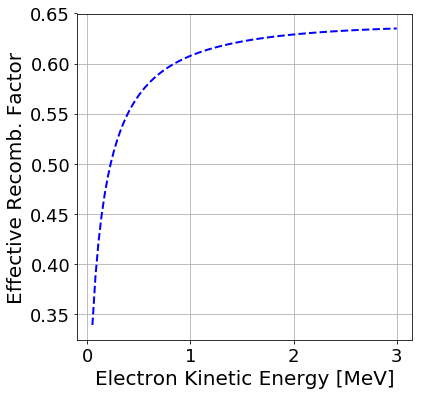

In [26]:
# Apply recombination model to get effective recombination for each electron energy
# return effective charge quenching amount
# effective recombination = amount of recombination for total energy lost by electron of given KE.

def EffectiveRecomb(ElectronEnergy,Estep,Field):
    
    # keep track of total energy lost
    dEtot = 0.
    # and total energy "seen" after recomb.
    dEobs = 0.
    
    while (ElectronEnergy > 1e-2):
    
        dedx = dEdx(ElectronEnergy)
        R    = RecombModBox(dedx,fModBoxA,fModBoxB,Field)
        
        dEtot += Estep
        dEobs += Estep * (1-R)
        
        ElectronEnergy -= Estep
        
        #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
        
    # perform last step
    dedx = dEdx(1e-2)
    dEtot += ElectronEnergy
    dEobs += ElectronEnergy * (1 - RecombModBox(dedx,fModBoxA,fModBoxB,Field))
    #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
    
    return dEobs/dEtot

def Charge(ElectronEnergy,efield):
    
    EffRecomb = EffectiveRecomb(ElectronEnergy,0.01,efield)
    Eobs = ElectronEnergy * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    return Qobs

EffectiveRecomb_v = np.vectorize(EffectiveRecomb)
Charge_v = np.vectorize(Charge)

EffectiveRecomb(0.25,0.01,0.273)

fig = plt.figure(figsize=(6,6))
Evals = np.linspace(0.05,3,100)
Rvals = []
for E in Evals:
    Rvals.append(EffectiveRecomb(E,0.01,0.273))
plt.plot(Evals,Rvals,'b--',lw=2)
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('Effective Recomb. Factor',fontsize=20)
plt.grid()
plt.show()



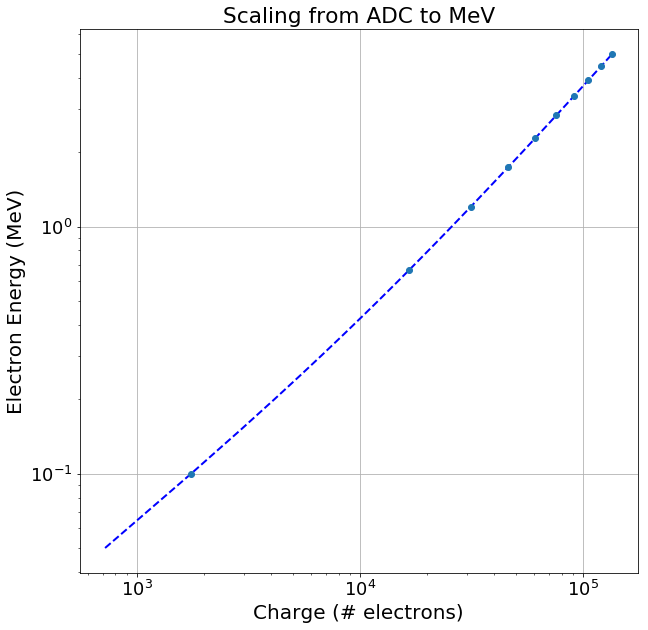

In [27]:
fig = plt.figure(figsize=(10,10))
Evals = np.linspace(0.05,5,100)
Qvals = []
for E in Evals:
    #R = EffectiveRecomb(E,0.01,0.273)
    Q = Charge(E,0.273)
    Qvals.append(Q)
    
fQ2E = interp1d(Qvals, Evals,kind='cubic')
xnew = np.linspace(Qvals[1], Qvals[-1], num=10, endpoint=True)
plt.plot(Qvals,Evals,'b--',xnew, fQ2E(xnew),'o',lw=2)
plt.ylabel('Electron Energy (MeV)',fontsize=20)
plt.xlabel('Charge (# electrons)',fontsize=20)
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.title('Scaling from ADC to MeV')
plt.show()
fig.savefig('Q2E.png', dpi=300)

In [28]:
# calculate Ar39 spectrum [in drifted electrons] accounting for recombination

# sample randomly from Ar39 spectrum and calculate visible charge for each event
Ar39_Q_v = []

Eavg = 0.

for n in xrange(5000):
    
    found = False
    while (found == False):
        Eval = np.random.uniform(Ar39_E_v[0],Ar39_E_v[-1])
        if (Ar39spectrum(Eval) > np.random.uniform(0,0.08) ): # 0.08 due to values in 1st histogram in notebook
            found = True
    Eavg += Eval
    EffRecomb = EffectiveRecomb(Eval,0.01,0.273)
    Eobs = Eval * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    Ar39_Q_v.append(Qobs)
Eavg /= 5000
print Eavg

0.238389956728


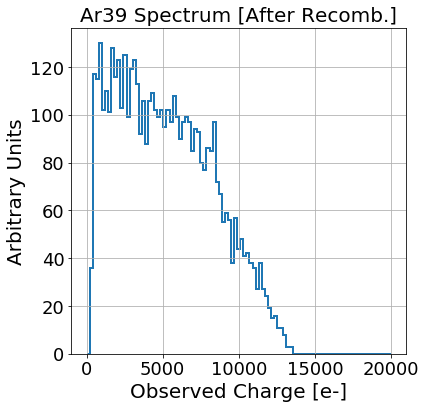

In [29]:
fig = plt.figure(figsize=(6,6))
plt.hist(Ar39_Q_v,bins=np.linspace(0,2e4,100),histtype='step',lw=2)
plt.grid()
plt.xlabel('Observed Charge [e-]',fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Spectrum [After Recomb.]',fontsize=20)
plt.show()

In [30]:
elec_KE = np.linspace(0.05,1,100)
elec_Q_273 = []
elec_Q_500 = []
for ke in elec_KE:
    elec_Q_273.append(Charge(ke,0.273)/1e3)
    elec_Q_500.append(Charge(ke,0.500)/1e3)

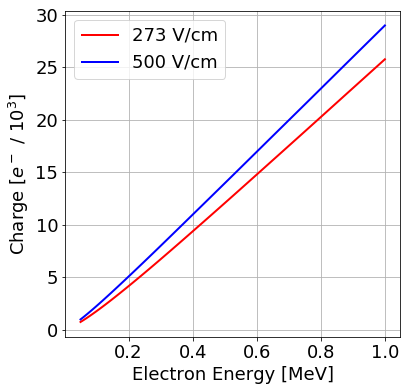

In [31]:
fig = plt.figure(figsize=(6,6))
plt.plot(elec_KE,elec_Q_273,lw=2,color='r',label='273 V/cm')
plt.plot(elec_KE,elec_Q_500,lw=2,color='b',label='500 V/cm')
plt.grid()
plt.xlabel('Electron Energy [MeV]')
plt.ylabel('Charge [$e^-$ / $10^3$]')
plt.legend(loc=2,fontsize=18)
plt.show()

In [32]:

def E_recoY_prod_electron(df,gain):
    YQ_prod_electron = df['Y_cluster_charge']
    QrecoY_prod_electron = YQ_prod_electron * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_prod_electron = fQ2E(QrecoY_prod_electron)
    return ErecoY_prod_electron


def E_recoU_prod_electron(df,gain):
    UQ_prod_electron = df['U_cluster_charge']
    QrecoU_prod_electron = UQ_prod_electron * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_prod_electron = fQ2E(QrecoU_prod_electron)
    return ErecoU_prod_electron



def E_recoV_prod_electron(df,gain):
    VQ_prod_electron = df['V_cluster_charge']
    QrecoV_prod_electron = VQ_prod_electron * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_prod_electron = fQ2E(QrecoV_prod_electron)
    return ErecoV_prod_electron


def E_sps_event(df,gain):
    Q_sps_event = df['Event_cluster_charge']
    Qreco_sps_event = Q_sps_event * gain #* (23.6/1e6) # MeV w/ no recomb factor
    Ereco_sps_event = fQ2E(Qreco_sps_event)
    return Ereco_sps_event

def E_sps(df,gain):
    Q_sps = df['sps_cluster_charge']
    Qreco_sps = Q_sps * gain #* (23.6/1e6) # MeV w/ no recomb factor
    Ereco_sps = fQ2E(Qreco_sps)
    return Ereco_sps




In [33]:



dfcut_match_prod_electron = df_Matching_prod_electron_match.query('Y_cluster_charge* 238.4 >0.')
dfcut_all_prod_electron   = df_Matching_prod_electron.query('Y_cluster_charge* 238.4 > 0.')



dfcut_match_prod_electron['energy'] = E_recoY_prod_electron(dfcut_match_prod_electron,238.4)
dfcut_all_prod_electron['energy']   = E_recoY_prod_electron(dfcut_all_prod_electron,238.4)



df_charge_conversion=df_Event_tree_prod_electron.query('Event_cluster_charge > 0.')

df_charge_conversion['energy'] = E_sps_event(df_charge_conversion,238.4)


df_sps_charge_conversion=df_Correlation_prod_electron_Sps.query('sps_cluster_charge > 0.')

df_sps_charge_conversion['energy'] = E_sps(df_sps_charge_conversion,238.4)


/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


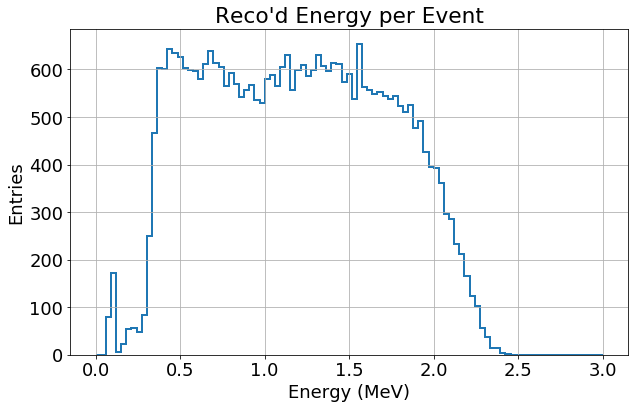

34473


In [34]:
# print df_Event_tree_prod_electron['Event_Energy_total_MeV']
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,3,100)

plt.hist(df_charge_conversion['energy'].values,bins=BINS,histtype='step',lw=2,label='Reco')


plt.title("Reco'd Energy per Event")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.grid()
#plt.legend(loc=2)
plt.show()
fig.savefig('Reco_electron_energy_per_event.png', dpi=300)

print(df_charge_conversion['energy'].shape[0])


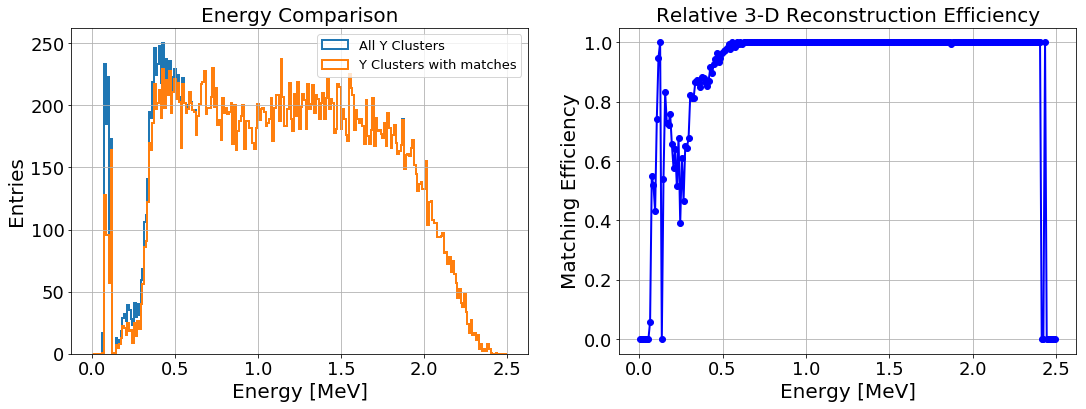

Minimum energy for any cluster on Y-Plane: 0.06502260637043214 MeV
Minimum energy for 3-D reco'd cluster on Y-Plane: 0.06760437683787841 MeV
maximum energy for any cluster on Y-Plane: 2.4335732423302145 MeV
maximum energy for 3-D reco'd cluster on Y-Plane: 2.4335732423302145 MeV
35984
34992


In [35]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2.5,250)
plt.hist(dfcut_all_prod_electron['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_prod_electron['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0,2.5,250)

vals2D_prod_electron, bins2D_prod_electron = np.histogram(dfcut_all_prod_electron['energy'].values,bins=BINS)
vals3D_prod_electron, bins3D_prod_electron = np.histogram(dfcut_match_prod_electron['energy'].values,bins=BINS)
binC_prod_electron = 0.5*(bins2D_prod_electron[1:]+bins2D_prod_electron[:-1])
vals2D_prod_electron = vals2D_prod_electron.astype(float)
#print vals2D
vals3D_prod_electron = vals3D_prod_electron.astype(float)
ratio_v_prod_electron = []
for i,v in enumerate(vals2D_prod_electron):
    if (v == 0):
        ratio_v_prod_electron.append(0.)
    else:
        ratio_v_prod_electron.append(vals3D_prod_electron[i]/v)
#print ratio_v
plt.plot(binC_prod_electron,ratio_v_prod_electron,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('Relative 3-D Reconstruction Efficiency',fontsize=20)

plt.grid()
plt.show()
fig.savefig('relative_efficiency.png', dpi=300)
print "Minimum energy for any cluster on Y-Plane:", dfcut_all_prod_electron['energy'].min(), "MeV"
print "Minimum energy for 3-D reco'd cluster on Y-Plane:", dfcut_match_prod_electron['energy'].min(), "MeV"
print "maximum energy for any cluster on Y-Plane:", dfcut_all_prod_electron['energy'].max(), "MeV"
print "maximum energy for 3-D reco'd cluster on Y-Plane:", dfcut_match_prod_electron['energy'].max(), "MeV"
print dfcut_all_prod_electron['energy'].shape[0]
print dfcut_match_prod_electron['energy'].shape[0]

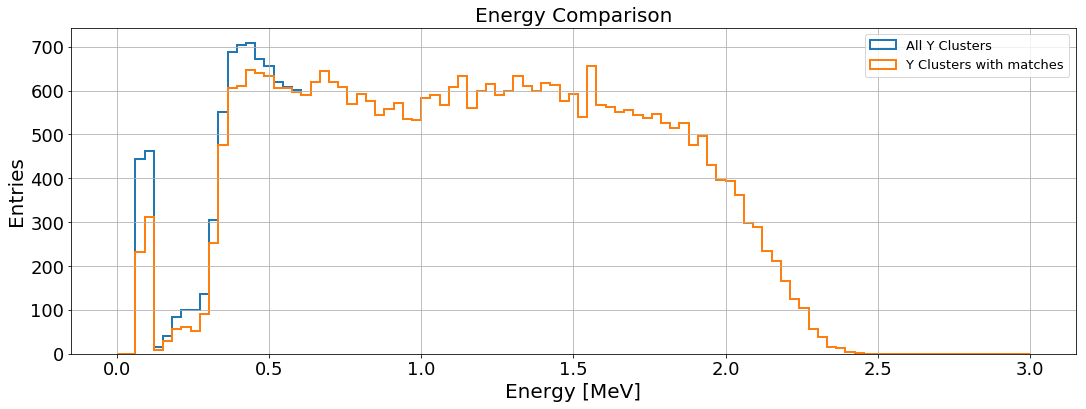

In [36]:
fig = plt.figure(figsize=(18,6))


BINS = np.linspace(0,3,100)
plt.hist(dfcut_all_prod_electron['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_prod_electron['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.show()

In [37]:
#print (df_Event_tree_prod_electron['Event_cluster_charge'].to_string())

In [38]:
#print (df_Event_tree_prod_electron['Event_Energy_100_MeV'].to_string())

In [39]:
print (len(dfcut_match_prod_electron['energy'].values))
print (len(df_Event_tree_prod_electron['Event_Energy_100_MeV'].values))
print (len(df_charge_conversion['energy'].values))
print(len(df_Event_tree_prod_electron['Event_cluster_charge'].values))

34992
50000
34473
50000


In [40]:
# df_charge_conversion['Event_Energy_100_MeV']= 1000*df_charge_conversion['Event_Energy_100_MeV'].values
# print (df_Event_tree_prod_electron['Event_cluster_charge'].to_string())
print (df_charge_conversion['energy'].shape[0])
print (df_charge_conversion['Event_Energy_total_MeV'].shape[0])

34473
34473


In [41]:
#print (df_charge_conversion['Event_Energy_total_MeV'].to_string())

In [42]:
#print (df_charge_conversion['energy'].to_string())

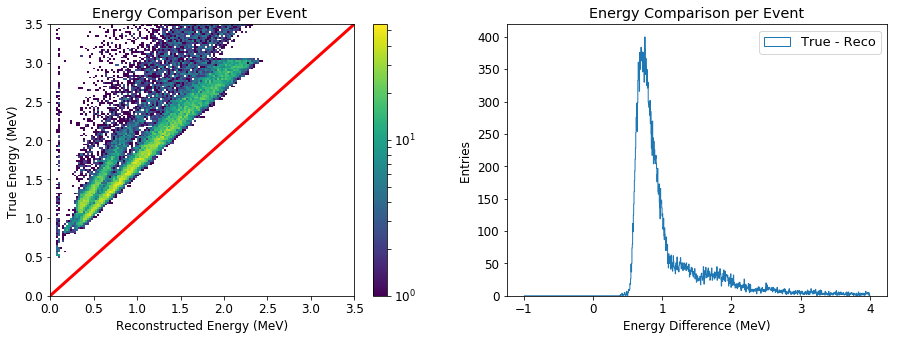

In [43]:
fig = plt.figure(figsize=(15,5))
plt.rcParams.update({'font.size': 12})
plt.subplot(1, 2, 1)
plt.hist2d(df_charge_conversion['energy'].values,df_charge_conversion['Event_Energy_total_MeV'].values, bins=(150,150), range=[[0,3.5], [0,3.5]], norm=LogNorm())#,label='Truth v/s Reco')
plt.plot([-1, 5], [-1, 5], 'r-', lw=3)
plt.colorbar()
plt.ylabel('True Energy (MeV) ')
plt.xlabel('Reconstructed Energy (MeV)')
plt.title('Energy Comparison per Event ')
plt.subplot(1, 2, 2)
BINS = np.linspace(-1,4,1000)
plt.hist((df_charge_conversion['Event_Energy_total_MeV']-df_charge_conversion['energy']).values,label='True - Reco',bins=BINS,histtype='step')
plt.ylabel('Entries ')
plt.xlabel('Energy Difference (MeV)')
plt.title('Energy Comparison per Event')
plt.legend(loc=1,fontsize=13)
plt.show()
fig.savefig('energy_resolution_electron_only_primary.png', dpi=500)

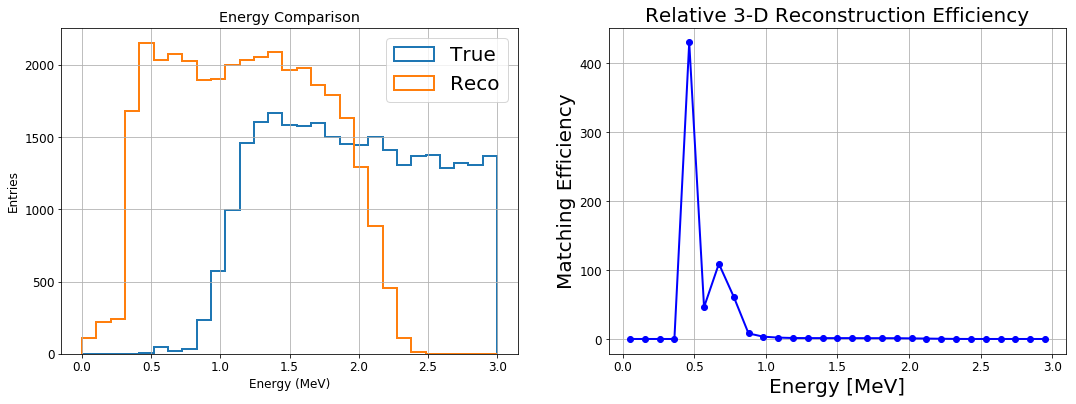

In [44]:
# print df_Event_tree_prod_electron['Event_Energy_total_MeV']
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,3,30)

plt.hist(df_charge_conversion['Event_Energy_total_MeV'].values,bins=BINS,histtype='step',lw=2,label='True')
plt.hist(df_charge_conversion['energy'].values,bins=BINS,histtype='step',lw=2,label='Reco')



plt.title("Energy Comparison")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.grid()
plt.legend(loc=1,fontsize=20)

plt.subplot(1, 2, 2)
vals_true_prod_electron, bins_true_prod_electron = np.histogram(df_charge_conversion['Event_Energy_total_MeV'].values,bins=BINS)
vals_reco_prod_electron, bins_reco_prod_electron = np.histogram(df_charge_conversion['energy'].values,bins=BINS)
binC_prod_electron = 0.5*(bins_true_prod_electron[1:]+bins_true_prod_electron[:-1])
vals_true_prod_electron = vals_true_prod_electron.astype(float)
#print vals_true
vals_reco_prod_electron = vals_reco_prod_electron.astype(float)
ratio_v_prod_electron = []
for i,v in enumerate(vals_true_prod_electron):
    if (v == 0):
        ratio_v_prod_electron.append(0.)
    else:
        ratio_v_prod_electron.append(vals_reco_prod_electron[i]/v)
#print ratio_v
plt.plot(binC_prod_electron,ratio_v_prod_electron,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('Relative 3-D Reconstruction Efficiency',fontsize=20)

plt.grid()

plt.show()
fig.savefig('absolute_efficiency.png', dpi=300)

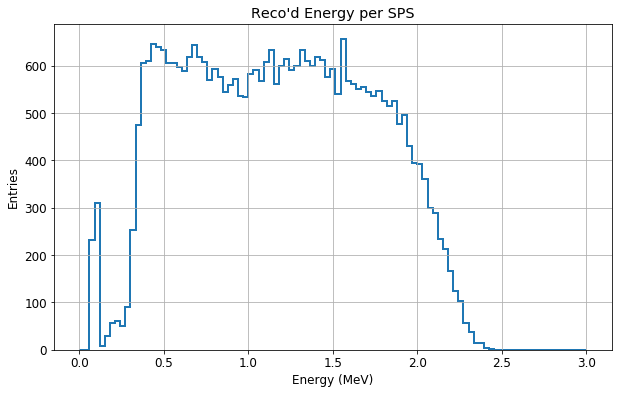

34992


In [45]:
# print df_Event_tree_prod_electron['Event_Energy_total_MeV']
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,3,100)

plt.hist(df_sps_charge_conversion['energy'].values,bins=BINS,histtype='step',lw=2,label='Reco')


plt.title("Reco'd Energy per SPS")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.grid()
#plt.legend(loc=2)
plt.show()
print(df_sps_charge_conversion['energy'].shape[0])


In [46]:
print df_Correlation_prod_electron_Sps.shape[0]
df_true_x=pd.DataFrame(np.random.randint(128,129,size=df_Correlation_prod_electron_Sps.shape[0]))
df_true_y=pd.DataFrame(np.random.randint(0,1,size=df_Correlation_prod_electron_Sps.shape[0]))
df_true_z=pd.DataFrame(np.random.randint(500,501,size=df_Correlation_prod_electron_Sps.shape[0]))

# print df_true_x.shape[0]
#print df_Correlation_prod_electron_Sps['sps_x'].to_string()
# df_true_x.describe()

34992


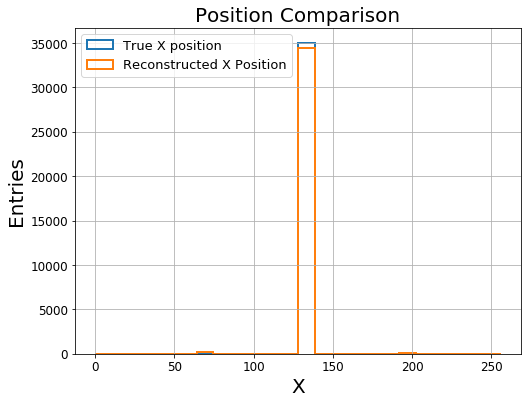

In [47]:
fig = plt.figure(figsize=(8,6))
# plt.subplot(1, 2, 1)
BINS = np.linspace(0,256,25)
plt.hist(df_true_x.values, bins=BINS,histtype='step',lw=2,label='True X position')
plt.hist(df_Correlation_prod_electron_Sps['sps_x'].values, bins=BINS,histtype='step',lw=2,label='Reconstructed X Position')
plt.xlabel("X",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Position Comparison',fontsize=20)
plt.legend(loc=2,fontsize=13)
plt.grid()
# plt.subplot(-10, 10, 100)
# plt.hist((df_true_x-df_Correlation_prod_electron_Sps['sps_x']).values, bins=BINS,histtype='step',lw=2)
# plt.xlabel("Difference",fontsize=20)
# plt.ylabel('Entries',fontsize=20)

# plt.legend(loc=1,fontsize=13)
# plt.grid()
plt.show()
fig.savefig('X-comparison_single_electron.png', dpi=300)

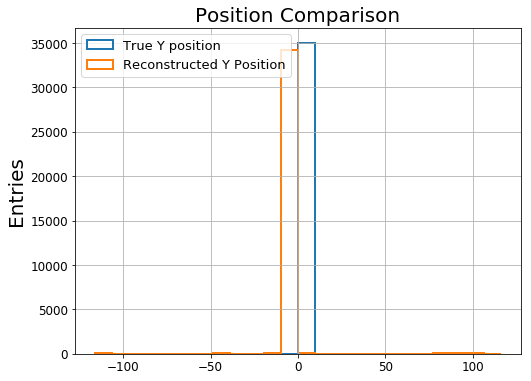

In [48]:
fig = plt.figure(figsize=(8,6))
# plt.subplot(1, 2, 1)
BINS = np.linspace(-116,116,25)
plt.hist(df_true_y.values, bins=BINS,histtype='step',lw=2,label='True Y position')
plt.hist(df_Correlation_prod_electron_Sps['sps_y'].values, bins=BINS,histtype='step',lw=2,label='Reconstructed Y Position')
plt.ylabel("y",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Position Comparison',fontsize=20)
plt.legend(loc=2,fontsize=13)
plt.grid()
# plt.subplot(-10, 10, 100)
# plt.hist((df_true_y-df_Correlation_prod_electron_Sps['sps_y']).values, bins=BINS,histtype='step',lw=2)
# plt.ylabel("Difference",fontsize=20)
# plt.ylabel('Entries',fontsize=20)

# plt.legend(loc=1,fontsize=13)
# plt.grid()
plt.show()
fig.savefig('y-comparison_single_electron.png', dpi=300)

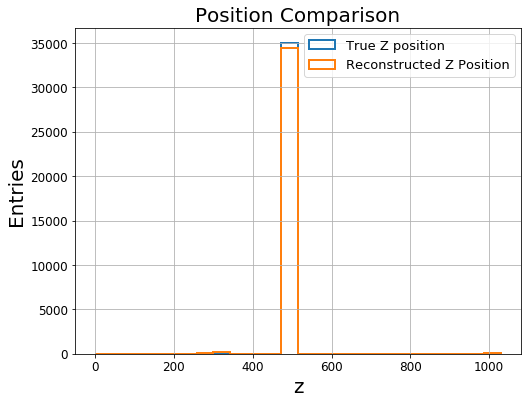

In [49]:
fig = plt.figure(figsize=(8,6))
# plt.subplot(1, 2, 1)
BINS = np.linspace(0,1030,25)
plt.hist(df_true_z.values, bins=BINS,histtype='step',lw=2,label='True Z position')
plt.hist(df_Correlation_prod_electron_Sps['sps_z'].values, bins=BINS,histtype='step',lw=2,label='Reconstructed Z Position')
plt.xlabel("z",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Position Comparison',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
# plt.subplot(-10, 10, 100)
# plt.hist((df_true_z-df_Correlation_prod_electron_Sps['sps_z']).values, bins=BINS,histtzpe='step',lw=2)
# plt.zlabel("Difference",fontsize=20)
# plt.zlabel('Entries',fontsize=20)

# plt.legend(loc=1,fontsize=13)
# plt.grid()
plt.show()
fig.savefig('z-comparison_single_electron.png', dpi=300)

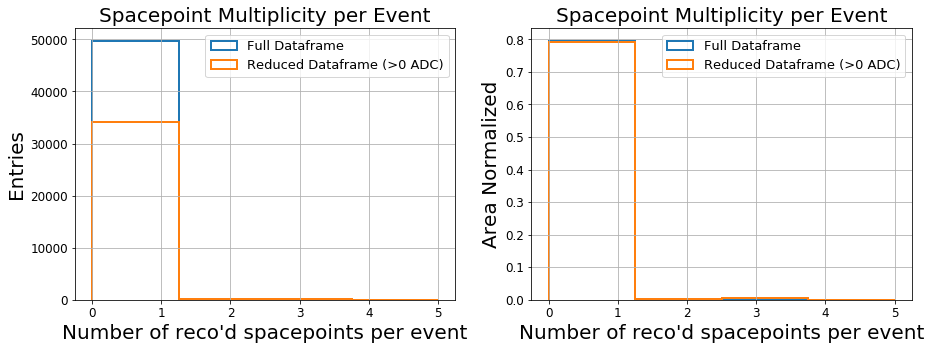

In [50]:
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
BINS = np.linspace(0,5,5)
plt.hist(df_Event_tree_prod_electron['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Full Dataframe')
plt.hist(df_charge_conversion['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Reduced Dataframe (>0 ADC)')
plt.xlabel("Number of reco'd spacepoints per event",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Spacepoint Multiplicity per Event',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()


plt.subplot(1, 2, 2)
BINS = np.linspace(0,5,5)
plt.hist(df_Event_tree_prod_electron['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Full Dataframe',density=True)
plt.hist(df_charge_conversion['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Reduced Dataframe (>0 ADC)',density=True)
plt.xlabel("Number of reco'd spacepoints per event",fontsize=20)
plt.ylabel('Area Normalized',fontsize=20)
plt.title('Spacepoint Multiplicity per Event',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.show()
fig.savefig('N_Sps.png', dpi=300)

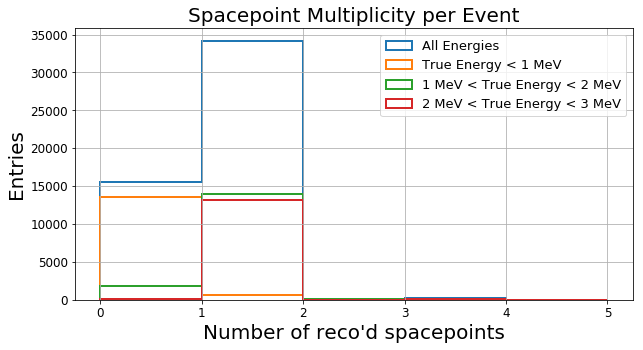

In [51]:
df_True_Energy_less_than_1 = df_Event_tree_prod_electron.query('Event_Energy_total_MeV < 1.') 
df_True_Energy_bw_1_and_2 = df_Event_tree_prod_electron.query('Event_Energy_total_MeV > 1. and Event_Energy_total_MeV < 2. ')
df_True_Energy_bw_2_and_3 = df_Event_tree_prod_electron.query('Event_Energy_total_MeV > 2. and Event_Energy_total_MeV < 3. ')

fig = plt.figure(figsize=(10,5))

BINS = np.linspace(0,5,6)
plt.hist(df_Event_tree_prod_electron['N_sps'].values, bins=BINS,histtype='step',lw=2,label='All Energies')
plt.hist(df_True_Energy_less_than_1['N_sps'].values, bins=BINS,histtype='step',lw=2,label='True Energy < 1 MeV')
plt.hist(df_True_Energy_bw_1_and_2['N_sps'].values, bins=BINS,histtype='step',lw=2,label='1 MeV < True Energy < 2 MeV')
plt.hist(df_True_Energy_bw_2_and_3['N_sps'].values, bins=BINS,histtype='step',lw=2,label='2 MeV < True Energy < 3 MeV')
# plt.hist(df_charge_conversion['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Reduced Dataframe (>0 ADC)')
plt.xlabel("Number of reco'd spacepoints",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Spacepoint Multiplicity per Event',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()

#plt.xticks(range(5))
plt.show()
fig.savefig('N_Sps_true_energy_function.png', dpi=300)

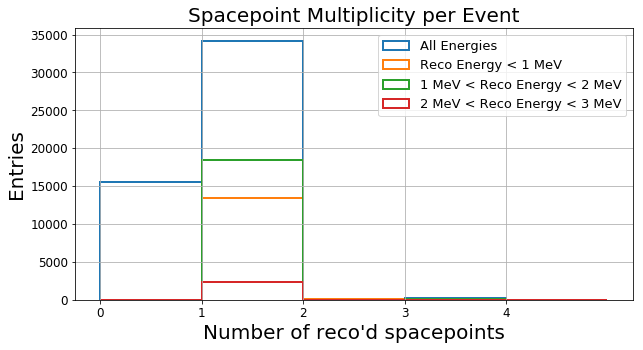

In [52]:

df_Reco_Energy_less_than_1 = df_charge_conversion.query('energy < 1.') 
df_Reco_Energy_bw_1_and_2 = df_charge_conversion.query('energy > 1. and energy < 2. ')
df_Reco_Energy_bw_2_and_3 = df_charge_conversion.query('energy > 2. and energy < 3. ')
fig = plt.figure(figsize=(10,5))

BINS = np.linspace(0,5,6)
plt.hist(df_Event_tree_prod_electron['N_sps'].values, bins=BINS,histtype='step',lw=2,label='All Energies')
plt.hist(df_Reco_Energy_less_than_1['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Reco Energy < 1 MeV')
plt.hist(df_Reco_Energy_bw_1_and_2['N_sps'].values, bins=BINS,histtype='step',lw=2,label='1 MeV < Reco Energy < 2 MeV')
plt.hist(df_Reco_Energy_bw_2_and_3['N_sps'].values, bins=BINS,histtype='step',lw=2,label='2 MeV < Reco Energy < 3 MeV')
# plt.hist(df_charge_conversion['N_sps'].values, bins=BINS,histtype='step',lw=2,label='Reduced Dataframe (>0 ADC)')
plt.xlabel("Number of reco'd spacepoints",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Spacepoint Multiplicity per Event',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.xticks(range(5))
plt.show()
fig.savefig('N_Sps_recod_energy_function.png', dpi=300)

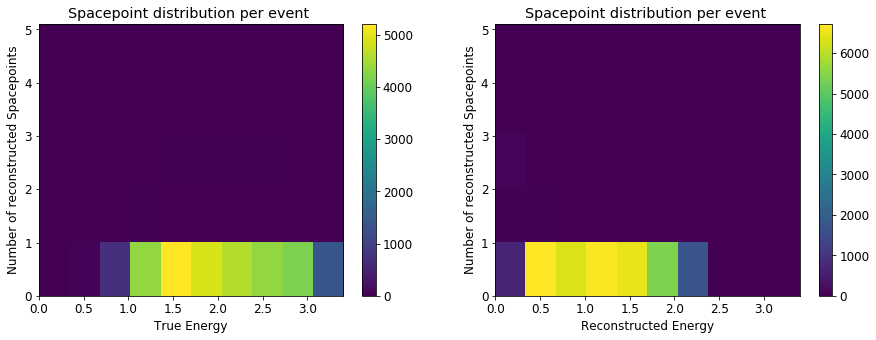

In [53]:
fig = plt.figure(figsize=(15,5))
plt.rcParams.update({'font.size': 12})
plt.subplot(1, 2, 1)
plt.hist2d(df_charge_conversion['Event_Energy_total_MeV'].values,df_charge_conversion['N_sps'].values, bins=(10,5), range=[[0,3.4], [0,5.1]])#, norm=LogNorm())
# plt.plot([0, 10], [0, 10], 'r-', lw=3)
plt.colorbar()
plt.ylabel('Number of reconstructed Spacepoints')
plt.xlabel('True Energy')
plt.title('Spacepoint distribution per event ')
plt.subplot(1, 2, 2)
plt.hist2d(df_charge_conversion['energy'].values,df_charge_conversion['N_sps'].values, bins=(10,5), range=[[0,3.4], [0,5.1]])#, norm=LogNorm())
# plt.plot([0, 10], [0, 10], 'r-', lw=3)
plt.colorbar()
plt.ylabel('Number of reconstructed Spacepoints')
plt.xlabel('Reconstructed Energy')
plt.title('Spacepoint distribution per event ')
plt.show()

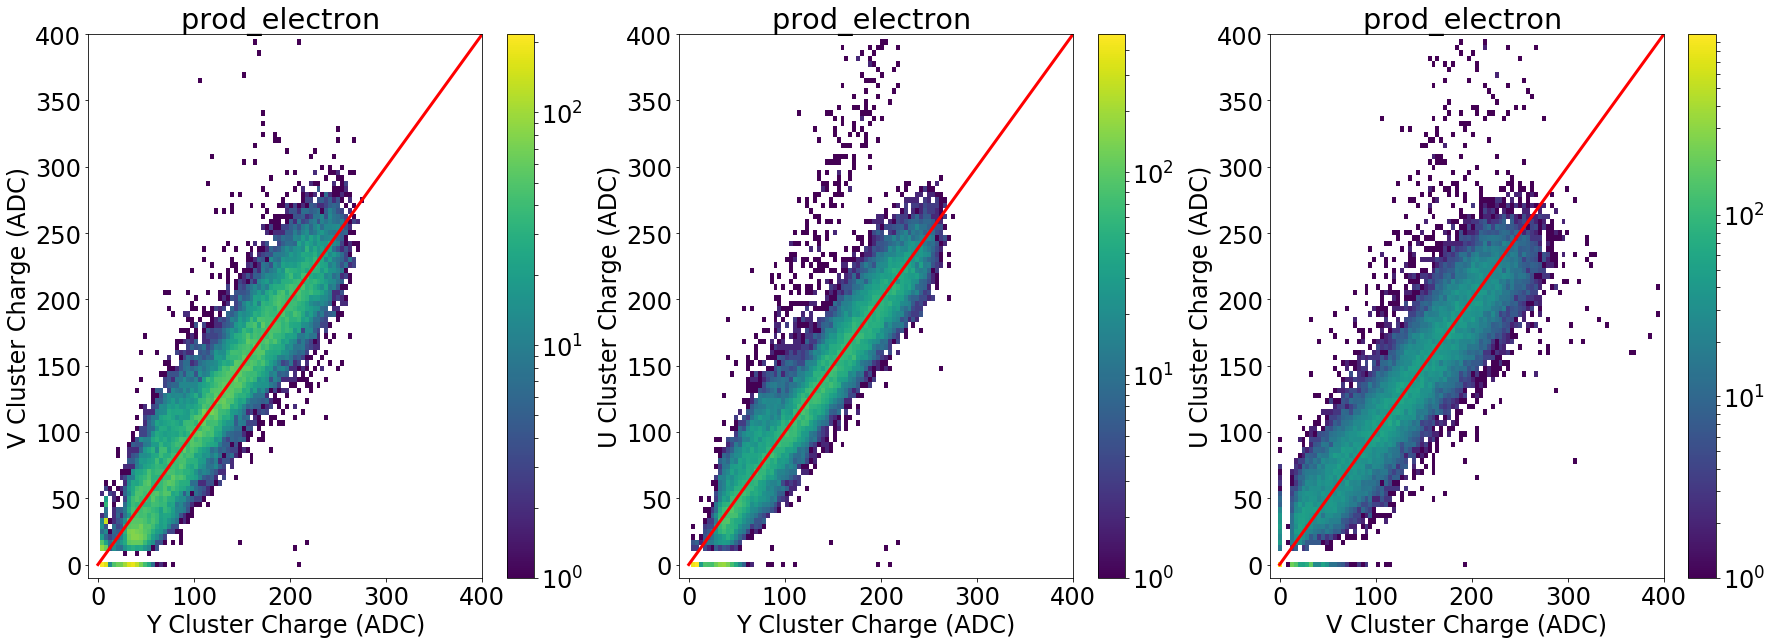

In [54]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(df_Matching_prod_electron['Y_cluster_charge'].values,df_Matching_prod_electron['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('prod_electron ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(df_Matching_prod_electron['Y_cluster_charge'].values,df_Matching_prod_electron['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('prod_electron ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(df_Matching_prod_electron['V_cluster_charge'].values,df_Matching_prod_electron['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('prod_electron ')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

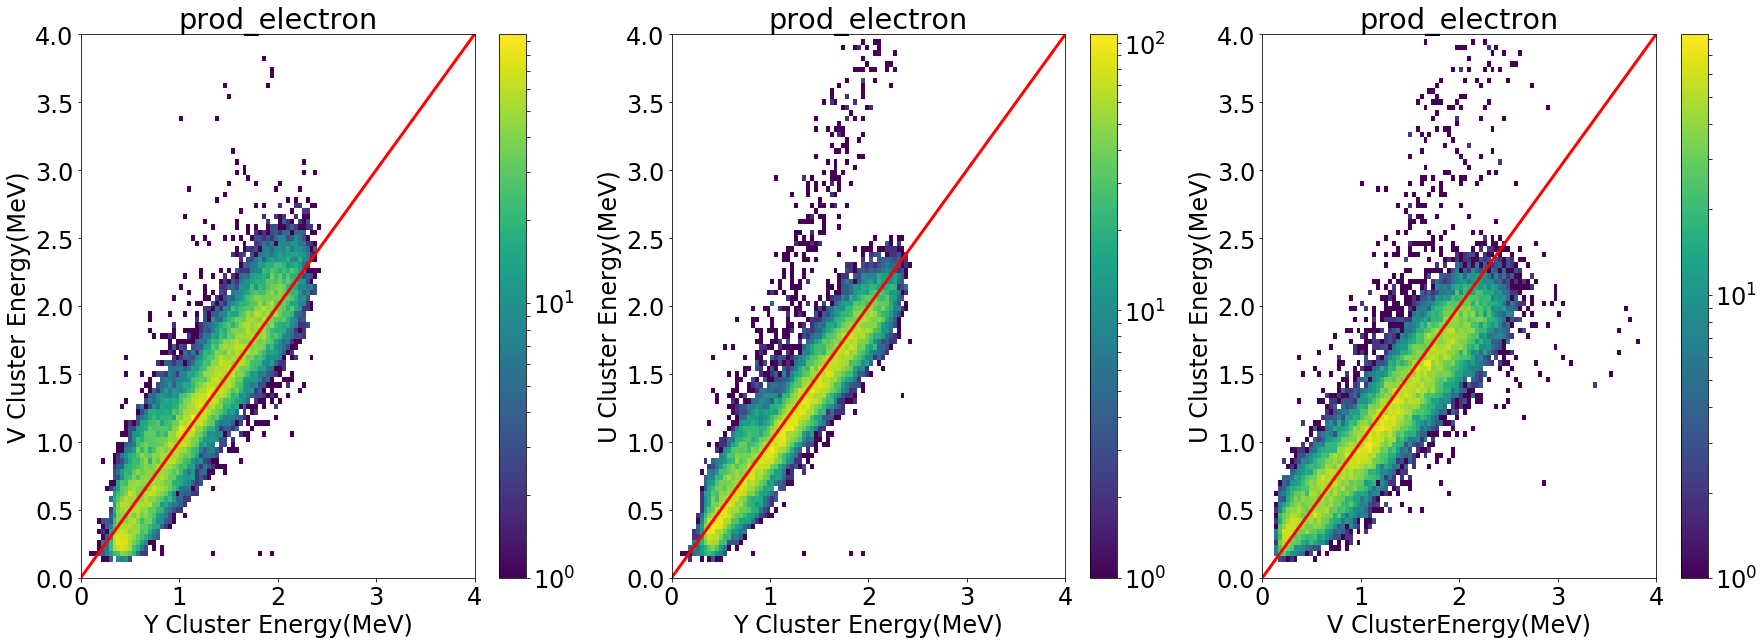

In [55]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge > 0.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge >0. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >0. '

dfChargeCut_prod_electron = df_Matching_prod_electron.query(CUT)

dfChargeCut_prod_electron['energyY_prod_electron'] = E_recoY_prod_electron(dfChargeCut_prod_electron,238.4)
dfChargeCut_prod_electron['energyU_prod_electron'] = E_recoU_prod_electron(dfChargeCut_prod_electron,232)
dfChargeCut_prod_electron['energyV_prod_electron'] = E_recoV_prod_electron(dfChargeCut_prod_electron,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_prod_electron['energyY_prod_electron'].values,dfChargeCut_prod_electron['energyV_prod_electron'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('prod_electron')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_prod_electron['energyY_prod_electron'].values,dfChargeCut_prod_electron['energyU_prod_electron'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('prod_electron')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_prod_electron['energyV_prod_electron'].values,dfChargeCut_prod_electron['energyU_prod_electron'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('prod_electron')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=27prod_electron